# 의사결정나무-예측

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import graphviz

#경고문구 무시
import warnings
warnings.filterwarnings('ignore')

In [3]:
matplotlib.rc('font',family='NanumGothic')

In [4]:
df=pd.read_csv('Concrete.csv',engine='python',encoding='949')

In [5]:
df_y=df['CONCRETE_COMPRESSIVE_STRENGTH']
df_x=df.drop('CONCRETE_COMPRESSIVE_STRENGTH',axis=1,inplace=False)

In [6]:
# 데이터 분할
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_x,df_y,test_size=0.3,random_state=1234)


df_trainx,df_vaild_x,df_trainy,df_vaild_y=train_test_split(df_train_x,df_train_y,test_size=0.4,random_state=1234)

print('train data x size:{}'.format(df_trainx.shape))
print('train data y size:{}'.format(df_trainy.shape))
print('test data x size:{}'.format(df_test_x.shape))
print('test data y size:{}'.format(df_test_y.shape))
print('vaild data x size:{}'.format(df_vaild_x.shape))
print('vaild data y size:{}'.format(df_vaild_y.shape))


train data x size:(432, 8)
train data y size:(432,)
test data x size:(309, 8)
test data y size:(309,)
vaild data x size:(289, 8)
vaild data y size:(289,)


# mse 기준

In [7]:
#기본모델 생성
tree_un=DecisionTreeRegressor(random_state=1234)
tree_un.fit(df_trainx,df_trainy)
print('score on test set:{:.3f}'.format(tree_un.score(df_trainx,df_trainy)))
print('score on test set:{:.3f}'.format(tree_un.score(df_vaild_x,df_vaild_y)))

score on test set:1.000
score on test set:0.734


In [8]:
#기본모델 설정값
tree_un

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1234, splitter='best')

In [9]:
#최적 leaf값 찾기
train_score=[]
vaild_score=[]
para_leaf=[n_leaf*1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree=DecisionTreeRegressor(random_state=1234,min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_trainx,df_trainy)
    train_score.append(tree.score(df_trainx,df_trainy))
    vaild_score.append(tree.score(df_vaild_x,df_vaild_y))
                      
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf']=para_leaf
df_score_leaf['TrainScore']=train_score
df_score_leaf['vaildScore']=vaild_score

In [10]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,vaildScore
0,1,1.000,0.734
1,2,0.984,0.722
2,3,0.963,0.713
3,4,0.953,0.720
4,5,0.923,0.704
5,6,0.911,0.689
6,7,0.893,0.680
7,8,0.878,0.682
8,9,0.862,0.657
9,10,0.850,0.668


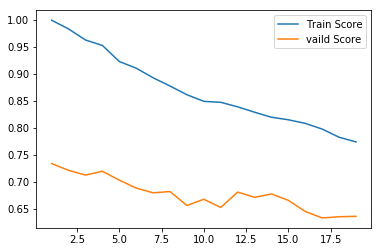

In [11]:
plt.plot(para_leaf,train_score,linestyle='-',label='Train Score')
plt.plot(para_leaf,vaild_score,linestyle='-',label='vaild Score')
plt.legend()

#과적합을 방지하기 위해 trainscore가 가장 낮은 leaf=19를 선택함.

In [12]:
#최적 split 값 찾기
train_score=[]
vaild_score=[]
para_split=[n_split*2 for n_split in range(2,20)]

for v_min_samples_split in para_split:
    tree=DecisionTreeRegressor(random_state=1234,min_samples_leaf=19,min_samples_split=v_min_samples_split)
    tree.fit(df_trainx,df_trainy)
    train_score.append(tree.score(df_trainx,df_trainy))
    vaild_score.append(tree.score(df_vaild_x,df_vaild_y))
                      
df_score_split = pd.DataFrame()
df_score_split['MinSamplessplit']=para_split
df_score_split['TrainScore']=train_score
df_score_split['vaildScore']=vaild_score

In [13]:
df_score_split.round(3)

,MinSamplessplit,TrainScore,vaildScore
0,4,0.774,0.637
1,6,0.774,0.637
2,8,0.774,0.637
3,10,0.774,0.637
4,12,0.774,0.637
5,14,0.774,0.637
6,16,0.774,0.637
7,18,0.774,0.637
8,20,0.774,0.637
9,22,0.774,0.637


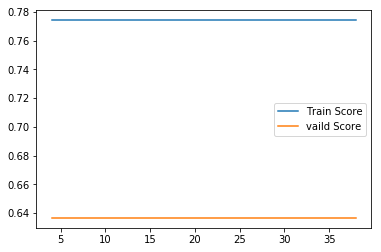

In [14]:
plt.plot(para_split,train_score,linestyle='-',label='Train Score')
plt.plot(para_split,vaild_score,linestyle='-',label='vaild Score')
plt.legend()

# vaildscore와 trainscore 값의 차이가 없다. 그러므로 tree 그래프를 간략화 하기 위해 split가 가장 큰 값을 선택한다.

In [15]:
# 최적 depth 찾기
train_score=[]
vaild_score=[]
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree=DecisionTreeRegressor(random_state=1234,min_samples_leaf=19,min_samples_split=38\
                               ,max_depth=v_max_depth)
    tree.fit(df_trainx,df_trainy)
    train_score.append(tree.score(df_trainx,df_trainy))
    vaild_score.append(tree.score(df_vaild_x,df_vaild_y))
                      
df_score_depth = pd.DataFrame()
df_score_depth['depth']=para_depth
df_score_depth['TrainScore']=train_score
df_score_depth['VaildScore']=vaild_score

In [16]:
df_score_depth.round(3)


,depth,TrainScore,VaildScore
0,1,0.283,0.196
1,2,0.509,0.419
2,3,0.638,0.518
3,4,0.716,0.596
4,5,0.765,0.616
5,6,0.774,0.637
6,7,0.774,0.637
7,8,0.774,0.637
8,9,0.774,0.637
9,10,0.774,0.637


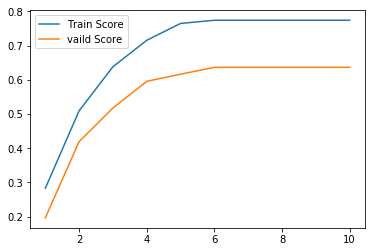

In [17]:
plt.plot(para_depth,train_score,linestyle='-',label='Train Score')
plt.plot(para_depth,vaild_score,linestyle='-',label='vaild Score')
plt.legend()

#vaildscore가 가장 높고 그래프의 단순화를 위해 depth가 적은 6을 선택한다.

In [18]:
#최종모델 
tree_graph=DecisionTreeRegressor(random_state=1234,min_samples_leaf=19,min_samples_split=38\
                                ,max_depth=6)
tree_graph.fit(df_trainx,df_trainy)


DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=19,
           min_samples_split=38, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1234, splitter='best')

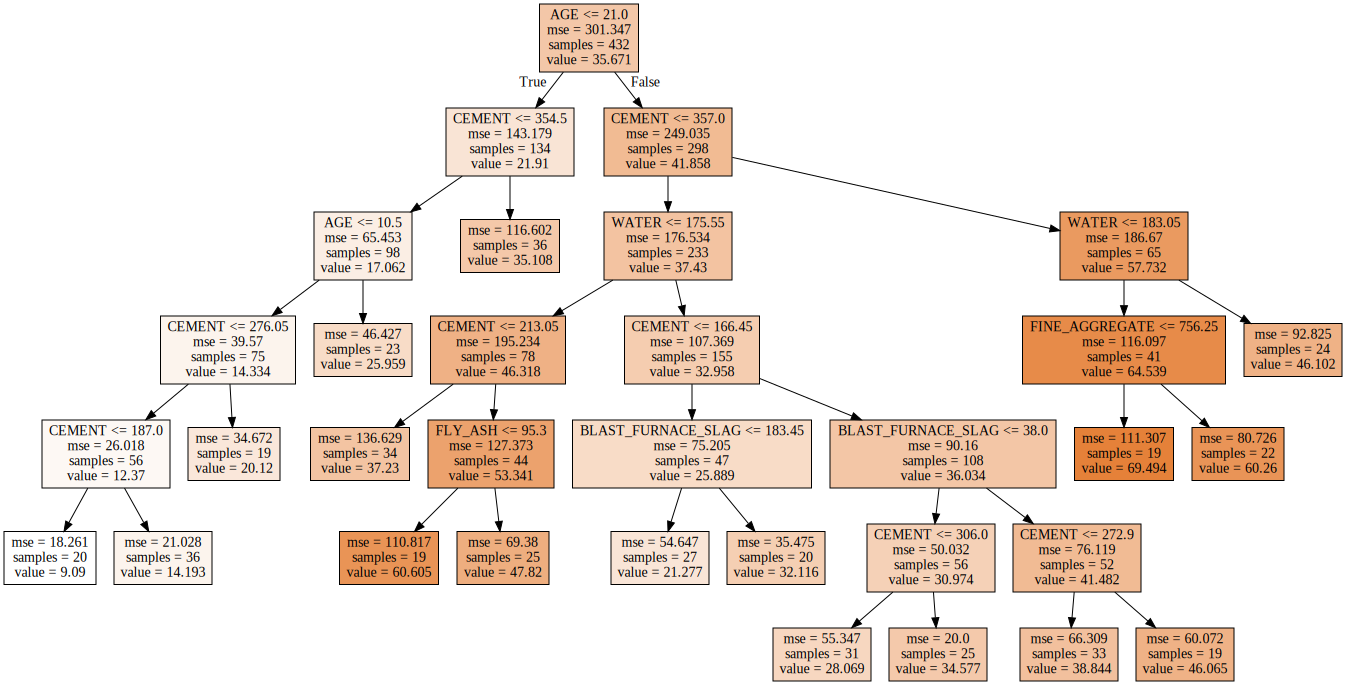

In [19]:
v_feature_names=df_trainx.columns
tree_final=DecisionTreeRegressor(random_state=1234,min_samples_leaf=19,min_samples_split=38\
                                ,max_depth=6)
tree_final.fit(df_trainx,df_trainy)
export_graphviz(tree_final,out_file='tree_depth.dot',feature_names=v_feature_names,impurity=True,filled=True)
with open('tree_depth.dot')as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

# Age가 21이하인  콘크리트의 평균 압축강도는 21.91이고 
# Age가 21이상인 콘크리트의 평균 압축강도는 41.858이다.
# 즉 age 높을 수록 압축강도가 높은 경향이 있다.

# 가장 약한 압축강도는 age가 10.5이하이고  cement 가 187이하일 때 이다.
# 가장 강한 압축강도는 age가 21이상이고 cement가 357이상, water가 183.05이하,fine_aggregate가 756.25이하일 때 이다.

In [20]:
df_importance=pd.DataFrame()
df_importance['feature']=v_feature_names
df_importance['importance']=tree_final.feature_importances_
df_importance.sort_values('importance',ascending=False,inplace=True)
df_importance.round(3)

,feature,importance
0,CEMENT,0.400
7,AGE,0.389
3,WATER,0.143
1,BLAST_FURNACE_SLAG,0.043
2,FLY_ASH,0.018
6,FINE_AGGREGATE,0.009
4,SUPERPLASTICIZER,0.000
5,COARSE_AGGREGATE,0.000


Text(0,0.5,'변수')

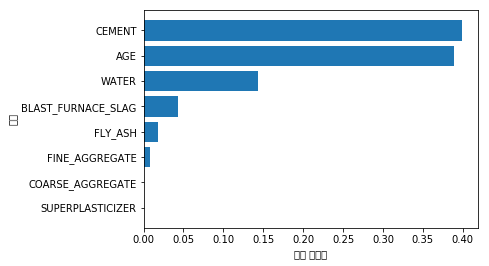

In [21]:
df_importance.sort_values('importance',ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['importance'])
plt.yticks(coordinates,df_importance['feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

# 변수의 중요도를 보았을때 cement가 압축강도에 가장 큰 영향을 미치며 그다음으로는 age, water가 있다.
# tree그래프와 변수의 중요도를 고려하였을 때 Cement,age가 높고  water가 낮을 때 압축강도가 증가하는 경향이 있다.


In [22]:
train_score=[]
test_score=[]


tree=DecisionTreeRegressor(random_state=1234,min_samples_leaf=19,min_samples_split=38\
                                ,max_depth=6)
tree.fit(df_trainx,df_trainy)
train_score.append(tree.score(df_trainx,df_trainy))
test_score.append(tree.score(df_test_x,df_test_y))
                      
df_score = pd.DataFrame()

df_score['TrainScore']=train_score
df_score['TestScore']=test_score
df_score.round(3)

# trainscore가 0.774로 높게 나와 과적합의 우려가 있었지만 testscore의 값이 0.712로 또한 높게 측정되었다.
# 대체적으로 모델이 잘 구현 된 것 같다.

,TrainScore,TestScore
0,0.774,0.712


In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
y_pred=tree.predict(df_test_x)
print('mse: {:.3f}'.format(mean_squared_error(df_test_y,y_pred)))
print('mae: {:.3f}'.format(mean_absolute_error(df_test_y,y_pred)))

# mse 와 mae의 차이가 매우 크게 나타난다. mae로 기준을 바꿔서 모델을 구현하면 전혀 다른 모델이 구현될 가능성이 높다.

mse: 75.150
mae: 6.909


# mae 기준

In [24]:
# mae 기준으로 기본 모델 구현

tree_un=DecisionTreeRegressor(random_state=1234,criterion='mae')
tree_un.fit(df_trainx,df_trainy)
print('score on test set:{:.3f}'.format(tree_un.score(df_trainx,df_trainy)))
print('score on test set:{:.3f}'.format(tree_un.score(df_vaild_x,df_vaild_y)))
print(tree_un)

train_score=[]
vaild_score=[]
para_leaf=[n_leaf*1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree=DecisionTreeRegressor(random_state=1234,min_samples_leaf=v_min_samples_leaf,criterion='mae')
    tree.fit(df_trainx,df_trainy)
    train_score.append(tree.score(df_trainx,df_trainy))
    vaild_score.append(tree.score(df_vaild_x,df_vaild_y))
                      
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf']=para_leaf
df_score_leaf['TrainScore']=train_score
df_score_leaf['vaildScore']=vaild_score
df_score_leaf.round(3)



score on test set:1.000
score on test set:0.754
DecisionTreeRegressor(criterion='mae', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1234, splitter='best')


,MinSamplesLeaf,TrainScore,vaildScore
0,1,1.000,0.754
1,2,0.974,0.712
2,3,0.944,0.724
3,4,0.920,0.713
4,5,0.901,0.738
5,6,0.884,0.717
6,7,0.875,0.707
7,8,0.862,0.703
8,9,0.853,0.688
9,10,0.841,0.685


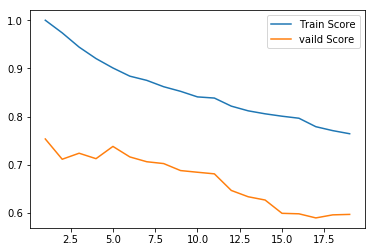

In [25]:
plt.plot(para_leaf,train_score,linestyle='-',label='Train Score')
plt.plot(para_leaf,vaild_score,linestyle='-',label='vaild Score')
plt.legend()
#vaildscore가 두번째로 높은 leaf=5 를 선택하였다. vaildscore가 가장 높은 값은 trainscore가 1로 과적합의 우려가 있어 
#두번째 높은 값을 선택하였다. 

In [26]:
train_score=[]
vaild_score=[]
para_split=[n_split*2 for n_split in range(2,20)]

for v_min_samples_split in para_split:
    tree=DecisionTreeRegressor(random_state=1234,min_samples_leaf=5,min_samples_split=v_min_samples_split,criterion='mae')
    tree.fit(df_trainx,df_trainy)
    train_score.append(tree.score(df_trainx,df_trainy))
    vaild_score.append(tree.score(df_vaild_x,df_vaild_y))
                      
df_score_split = pd.DataFrame()
df_score_split['MinSamplessplit']=para_split
df_score_split['TrainScore']=train_score
df_score_split['vaildScore']=vaild_score

df_score_split.round(3)


,MinSamplessplit,TrainScore,vaildScore
0,4,0.901,0.738
1,6,0.901,0.738
2,8,0.901,0.738
3,10,0.901,0.738
4,12,0.896,0.711
5,14,0.886,0.704
6,16,0.872,0.704
7,18,0.862,0.696
8,20,0.853,0.695
9,22,0.852,0.694


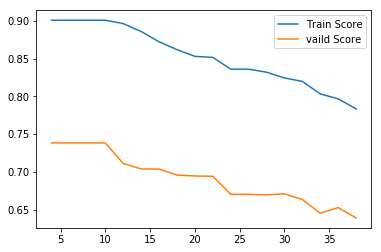

In [27]:
plt.plot(para_split,train_score,linestyle='-',label='Train Score')
plt.plot(para_split,vaild_score,linestyle='-',label='vaild Score')
plt.legend()

#vaildscore의 값이 가장 크고  split의 크기가 큰 10을 선택하였다.

In [28]:
train_score=[]
vaild_score=[]
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree=DecisionTreeRegressor(random_state=1234,min_samples_leaf=5,min_samples_split=10\
                               ,max_depth=v_max_depth,criterion='mae')
    tree.fit(df_trainx,df_trainy)
    train_score.append(tree.score(df_trainx,df_trainy))
    vaild_score.append(tree.score(df_vaild_x,df_vaild_y))
                      
df_score_depth = pd.DataFrame()
df_score_depth['depth']=para_depth
df_score_depth['TrainScore']=train_score
df_score_depth['TestScore']=vaild_score

df_score_depth.round(3)
#trainscore가 가장 큰 depth=6를 선택한다.

,depth,TrainScore,TestScore
0,1,0.267,0.179
1,2,0.499,0.324
2,3,0.662,0.493
3,4,0.742,0.564
4,5,0.831,0.679
5,6,0.879,0.750
6,7,0.894,0.745
7,8,0.900,0.737
8,9,0.901,0.725
9,10,0.901,0.738


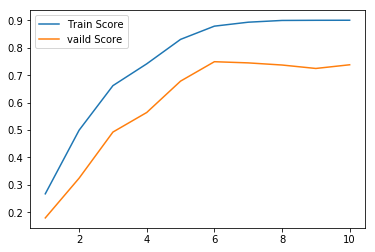

In [29]:
plt.plot(para_depth,train_score,linestyle='-',label='Train Score')
plt.plot(para_depth,vaild_score,linestyle='-',label='vaild Score')
plt.legend()

In [30]:
#최종모델
tree_graph=DecisionTreeRegressor(random_state=1234,min_samples_leaf=5,min_samples_split=10\
                                ,max_depth=6,criterion='mae')
tree_graph.fit(df_trainx,df_trainy)


DecisionTreeRegressor(criterion='mae', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1234, splitter='best')

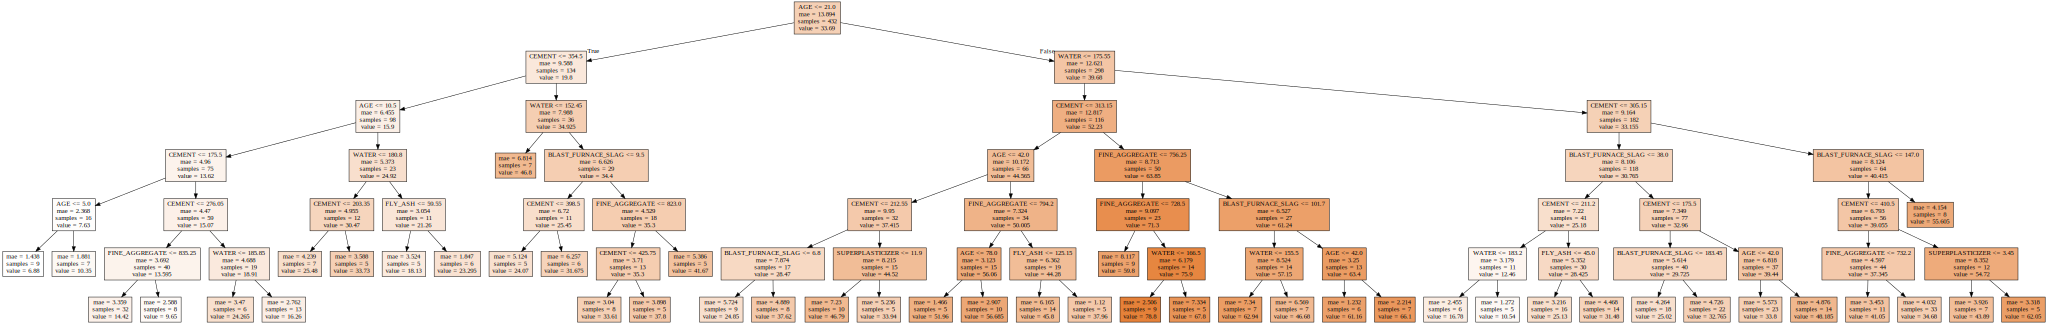

In [31]:
#train data이용그림
v_feature_names=df_trainx.columns
tree_final=DecisionTreeRegressor(random_state=1234,min_samples_leaf=5,min_samples_split=10\
                                ,max_depth=6,criterion='mae')
tree_final.fit(df_trainx,df_trainy)
export_graphviz(tree_final,out_file='tree_depth.dot',feature_names=v_feature_names,impurity=True,filled=True)
with open('tree_depth.dot')as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

# 가장 약한 압축강도는 age가 5이하이고  cement 가 175.5이하일 때 이다.
# 가장 강한 압축강도는 age가 21이상이고  water가 166.5이하, cement가 313.15이상,
# fine_aggregate가 756.25이하 728.5이상 일 때 이다.

,feature,importance
0,CEMENT,0.331
7,AGE,0.308
3,WATER,0.186
1,BLAST_FURNACE_SLAG,0.081
6,FINE_AGGREGATE,0.057
4,SUPERPLASTICIZER,0.019
2,FLY_ASH,0.019
5,COARSE_AGGREGATE,0.000


Text(0,0.5,'변수')

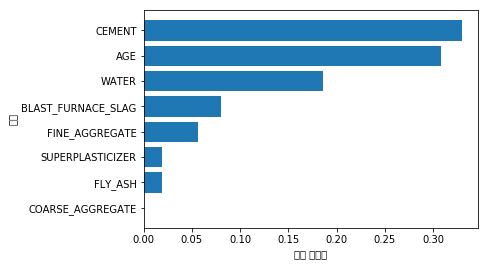

In [32]:
df_importance=pd.DataFrame()
df_importance['feature']=v_feature_names
df_importance['importance']=tree_final.feature_importances_
df_importance.sort_values('importance',ascending=False,inplace=True)
display(df_importance.round(3))

df_importance.sort_values('importance',ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['importance'])
plt.yticks(coordinates,df_importance['feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

# 변수의 중요도를 보았을때 cement가 압축강도에 가장 큰 영향을 미치며 그다음으로는 age, water,BLAST_FURNACE_SLAG가 있다.
# tree그래프와 함께 고려했을 때 Cement,ag,BLAST_FURNACE_SLAGe가 높고  water가 낮을 때 압축강도가 증가하는 경향이 있다.

In [33]:
train_score=[]
test_score=[]


tree=DecisionTreeRegressor(random_state=1234,min_samples_leaf=5,min_samples_split=10\
                               ,max_depth=6,criterion='mae')
tree.fit(df_trainx,df_trainy)
train_score.append(tree.score(df_trainx,df_trainy))
test_score.append(tree.score(df_test_x,df_test_y))
                      
df_score = pd.DataFrame()

df_score['TrainScore']=train_score
df_score['TestScore']=test_score
df_score.round(3)

#최종 모델의 trainscore값이 높지만 testscore의 값 또한 높으므로 과적합은 아니다.
#mse로 만든 모델보다 예측값이 높다. 


,TrainScore,TestScore
0,0.879,0.759


# 랜덤포레스트

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import graphviz

df=pd.read_csv('Concrete.csv',engine='python',encoding='949')
df_y=df['CONCRETE_COMPRESSIVE_STRENGTH']
df_x=df.drop('CONCRETE_COMPRESSIVE_STRENGTH',axis=1,inplace=False)
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_x,df_y,test_size=0.3,random_state=1234)
df_trainx,df_vaild_x,df_trainy,df_vaild_y=train_test_split(df_train_x,df_train_y,test_size=0.4,random_state=1234)

print('train data x size:{}'.format(df_trainx.shape))
print('train data y size:{}'.format(df_trainy.shape))
print('test data x size:{}'.format(df_test_x.shape))
print('test data y size:{}'.format(df_test_y.shape))
print('vaild data x size:{}'.format(df_vaild_x.shape))
print('vaild data y size:{}'.format(df_vaild_y.shape))


train data x size:(432, 8)
train data y size:(432,)
test data x size:(309, 8)
test data y size:(309,)
vaild data x size:(289, 8)
vaild data y size:(289,)


In [35]:
rf_un=RandomForestRegressor(random_state=1234)
rf_un.fit(df_trainx,df_trainy)
print('score on training set:{:.3f}'.format(rf_un.score(df_trainx,df_trainy)))
print('score on vaild set:{:.3f}'.format(rf_un.score(df_vaild_x,df_vaild_y)))
rf_un

score on training set:0.972
score on vaild set:0.817


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

In [36]:
train_score=[]
vaild_score=[]
para_n_tree=[n_tree*10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf=RandomForestRegressor(n_estimators=v_n_estimators,random_state=1234)
    rf.fit(df_trainx,df_trainy)
    train_score.append(rf.score(df_trainx,df_trainy))
    vaild_score.append(rf.score(df_vaild_x,df_vaild_y))
                      
df_score_n = pd.DataFrame()
df_score_n['n']=para_n_tree
df_score_n['TrainScore']=train_score
df_score_n['vaildScore']=vaild_score



In [37]:
df_score_n.round(3)

,n,TrainScore,vaildScore
0,10,0.972,0.817
1,20,0.978,0.828
2,30,0.979,0.828
3,40,0.980,0.827
4,50,0.981,0.830
5,60,0.981,0.832
6,70,0.981,0.831
7,80,0.982,0.830
8,90,0.982,0.829
9,100,0.982,0.830


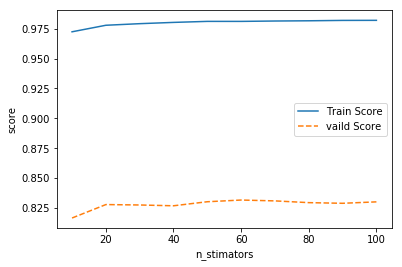

In [38]:
plt.plot(para_n_tree,train_score,linestyle='-',label='Train Score')
plt.plot(para_n_tree,vaild_score,linestyle='--',label='vaild Score')
plt.ylabel('score'); plt.xlabel('n_stimators')
plt.legend()
# vaildscore가 가장 높을 떄인 n=60을 선택한다.

In [39]:
train_score=[]
vaild_score=[]
para_leaf=[n_leaf*1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf=RandomForestRegressor(random_state=1234,n_estimators=60,\
                             min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_trainx,df_trainy))
    vaild_score.append(rf.score(df_vaild_x,df_vaild_y))
                      
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf']=para_leaf
df_score_leaf['TrainScore']=train_score
df_score_leaf['vaildScore']=vaild_score
df_score_leaf.round(3)
#0.857-0.839가 가장 차이가 적으므로 leaf를 17로 선택한다.

,MinSamplesLeaf,TrainScore,vaildScore
0,1,0.984,0.981
1,2,0.972,0.968
2,3,0.959,0.956
3,4,0.947,0.944
4,5,0.935,0.933
5,6,0.926,0.923
6,7,0.918,0.915
7,8,0.911,0.905
8,9,0.903,0.895
9,10,0.898,0.887


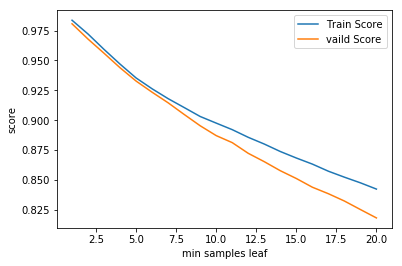

In [40]:
plt.plot(para_leaf,train_score,linestyle='-',label='Train Score')
plt.plot(para_leaf,vaild_score,linestyle='-',label='vaild Score')
plt.ylabel('score'); plt.xlabel('min samples leaf')
plt.legend()

In [41]:
train_score=[]
vaild_score=[]
para_split=[n_split*2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf=RandomForestRegressor(random_state=1234,n_estimators=60,\
                             min_samples_leaf=17,min_samples_split=v_min_samples_split)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_trainx,df_trainy))
    vaild_score.append(rf.score(df_vaild_x,df_vaild_y))
              
df_score_split = pd.DataFrame()
df_score_split['MinSamplessplit']=para_split
df_score_split['TrainScore']=train_score
df_score_split['vaildScore']=vaild_score

df_score_split.round(3)

#vaildscore가 크고 split값도 큰 34로 선택한다.

,MinSamplessplit,TrainScore,vaildScore
0,4,0.857,0.839
1,6,0.857,0.839
2,8,0.857,0.839
3,10,0.857,0.839
4,12,0.857,0.839
5,14,0.857,0.839
6,16,0.857,0.839
7,18,0.857,0.839
8,20,0.857,0.839
9,22,0.857,0.839


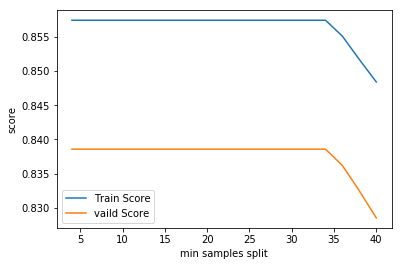

In [42]:
plt.plot(para_split,train_score,linestyle='-',label='Train Score')
plt.plot(para_split,vaild_score,linestyle='-',label='vaild Score')
plt.ylabel('score'); plt.xlabel('min samples split')
plt.legend()

In [43]:
train_score=[]
vaild_score=[]
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf=RandomForestRegressor(random_state=1234,n_estimators=60,\
                             min_samples_leaf=17,min_samples_split=34\
                               ,max_depth=v_max_depth)
    rf.fit(df_trainx,df_trainy)
    train_score.append(rf.score(df_trainx,df_trainy))
    vaild_score.append(rf.score(df_vaild_x,df_vaild_y))
                      
df_score_depth = pd.DataFrame()
df_score_depth['depth']=para_depth
df_score_depth['TrainScore']=train_score
df_score_depth['vaildScore']=vaild_score

df_score_depth.round(3)

#depth는 vaildscore가 가장 높은 6을 사용한다.

,depth,TrainScore,vaildScore
0,1,0.393,0.327
1,2,0.635,0.541
2,3,0.747,0.642
3,4,0.798,0.692
4,5,0.815,0.712
5,6,0.817,0.713
6,7,0.817,0.713
7,8,0.817,0.713
8,9,0.817,0.713
9,10,0.817,0.713


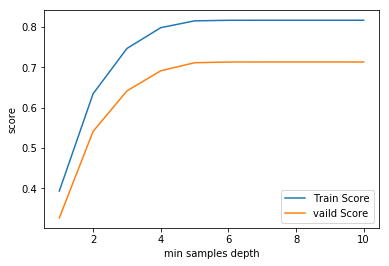

In [44]:
plt.plot(para_depth,train_score,linestyle='-',label='Train Score')
plt.plot(para_depth,vaild_score,linestyle='-',label='vaild Score')
plt.ylabel('score'); plt.xlabel('min samples depth')
plt.legend()

In [45]:
rf_final=RandomForestRegressor(random_state=1234,n_estimators=60,\
                             min_samples_leaf=17,min_samples_split=34\
                               ,max_depth=6)
rf_final.fit(df_trainx,df_trainy)
print('score on trainig set:{:.3f}'.format(rf_final.score(df_trainx,df_trainy)))
print('score on vaild set:{:.3f}'.format(rf_final.score(df_vaild_x,df_vaild_y)))
print('score on test set:{:.3f}'.format(rf_final.score(df_test_x,df_test_y)))
rf_final

#최종 모델이 train,vaild 둘다 높은 설명력을 가지며 test데이터에서도 0.758로 높은 예측력을 가진다.

score on trainig set:0.817
score on vaild set:0.713
score on test set:0.758


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=34,
           min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=1,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

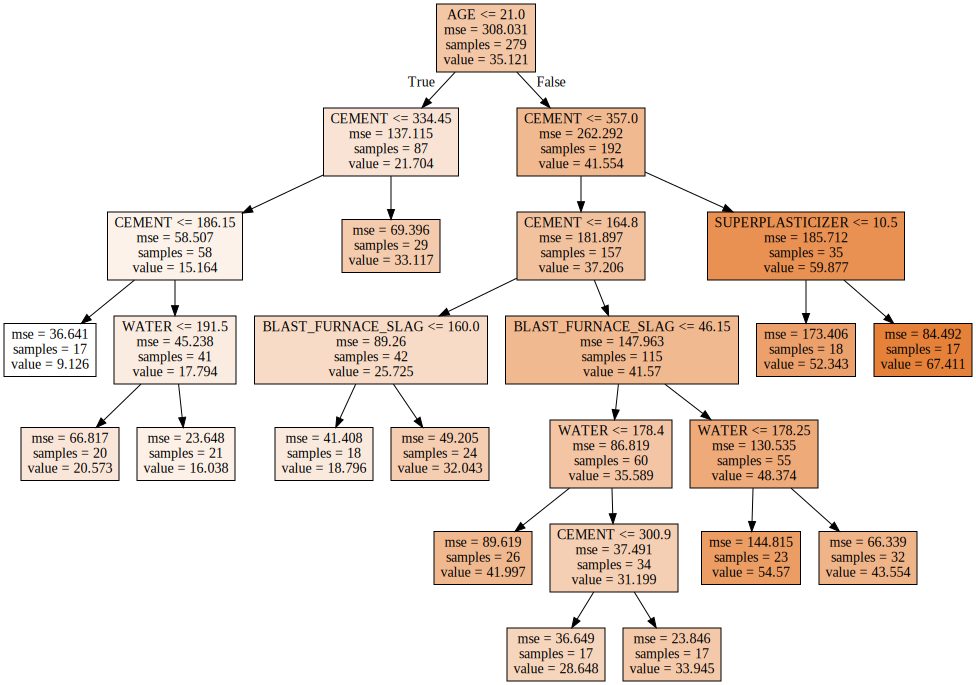

In [46]:
#train그림
v_feature_names=df_trainx.columns

export_graphviz(rf_final.estimators_[0],out_file='rfr_final_0.dot',\
                feature_names=v_feature_names,impurity=True,filled=True)
with open('rfr_final_0.dot')as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))


# 가장 약한 압축강도는 age가 21이하이고  cement 가 186.15이하일 때 이다.
# 가장 강한 압축강도는 age가 21이상이고   cement가 357이상,SUPERPLASTICIZER가 10.5이상 일 때 이다.


In [47]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
y_pred=rf_final.predict(df_test_x)
print('mse: {:.3f}'.format(mean_squared_error(df_test_y,y_pred)))
print('mae: {:.3f}'.format(mean_absolute_error(df_test_y,y_pred)))

# mse 와 mae의 차이가 매우 크게 나타난다. mae로 기준을 바꿔서 모델을 구현하면 전혀 다른 모델이 구현될 가능성이 높다.

mse: 63.007
mae: 6.485


# mae 기준

기본 모델
score on training set:0.970
score on vaild set:0.821
RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1234, verbose=0, warm_start=False) 


n 스코어


,n,TrainScore,vaildScore
0,10,0.970,0.821
1,20,0.975,0.823
2,30,0.977,0.822
3,40,0.978,0.822
4,50,0.979,0.825
5,60,0.980,0.829
6,70,0.980,0.829
7,80,0.980,0.829
8,90,0.980,0.829
9,100,0.980,0.828


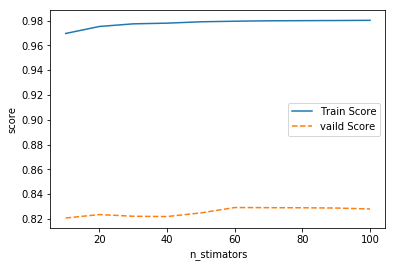

In [48]:
rf_un=RandomForestRegressor(random_state=1234,criterion='mae')
rf_un.fit(df_trainx,df_trainy)
print('기본 모델')
print('score on training set:{:.3f}'.format(rf_un.score(df_trainx,df_trainy)))
print('score on vaild set:{:.3f}'.format(rf_un.score(df_vaild_x,df_vaild_y)))
print(rf_un,'\n\n')

train_score=[]
vaild_score=[]
para_n_tree=[n_tree*10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf=RandomForestRegressor(n_estimators=v_n_estimators,random_state=1234,criterion='mae')
    rf.fit(df_trainx,df_trainy)
    train_score.append(rf.score(df_trainx,df_trainy))
    vaild_score.append(rf.score(df_vaild_x,df_vaild_y))

print('n 스코어')   
df_score_n = pd.DataFrame()
df_score_n['n']=para_n_tree
df_score_n['TrainScore']=train_score
df_score_n['vaildScore']=vaild_score
display(df_score_n.round(3))


plt.plot(para_n_tree,train_score,linestyle='-',label='Train Score')
plt.plot(para_n_tree,vaild_score,linestyle='--',label='vaild Score')
plt.ylabel('score'); plt.xlabel('n_stimators')
plt.legend()

#vaildscore의 값이 적당히 높고 trainscore값도 좀 낮은 n=30을 선택하였다.

,MinSamplesLeaf,TrainScore,vaildScore
0,1,0.983,0.979
1,2,0.963,0.954
2,3,0.945,0.937
3,4,0.934,0.925
4,5,0.925,0.913
5,6,0.915,0.904
6,7,0.908,0.892
7,8,0.903,0.884
8,9,0.898,0.874
9,10,0.893,0.868


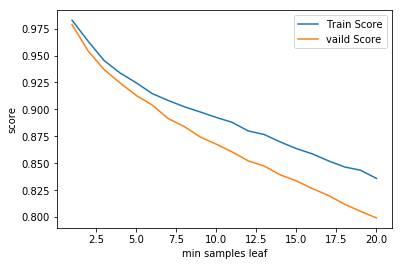

In [49]:
train_score=[]
vaild_score=[]
para_leaf=[n_leaf*1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf=RandomForestRegressor(random_state=1234,n_estimators=30,\
                             min_samples_leaf=v_min_samples_leaf,criterion='mae')
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_trainx,df_trainy))
    vaild_score.append(rf.score(df_vaild_x,df_vaild_y))
                      
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf']=para_leaf
df_score_leaf['TrainScore']=train_score
df_score_leaf['vaildScore']=vaild_score
display(df_score_leaf.round(3))


plt.plot(para_leaf,train_score,linestyle='-',label='Train Score')
plt.plot(para_leaf,vaild_score,linestyle='-',label='vaild Score')
plt.ylabel('score'); plt.xlabel('min samples leaf')
plt.legend()

#vaildscore와 trainscore의 차가 적은 leaf=11을 선택하였다.

,MinSamplessplit,TrainScore,vaildScore
0,4,0.888,0.860
1,6,0.888,0.860
2,8,0.888,0.860
3,10,0.888,0.860
4,12,0.888,0.860
5,14,0.888,0.860
6,16,0.888,0.860
7,18,0.888,0.860
8,20,0.888,0.860
9,22,0.888,0.860


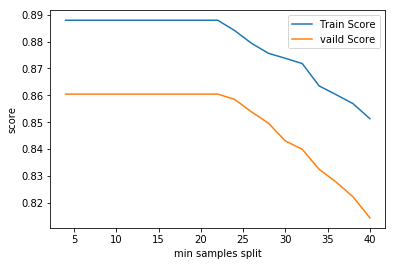

In [50]:
train_score=[]
vaild_score=[]
para_split=[n_split*2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf=RandomForestRegressor(random_state=1234,n_estimators=30,\
                             min_samples_leaf=11,min_samples_split=v_min_samples_split,criterion='mae')
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_trainx,df_trainy))
    vaild_score.append(rf.score(df_vaild_x,df_vaild_y))
              
df_score_split = pd.DataFrame()
df_score_split['MinSamplessplit']=para_split
df_score_split['TrainScore']=train_score
df_score_split['vaildScore']=vaild_score

display(df_score_split.round(3))

plt.plot(para_split,train_score,linestyle='-',label='Train Score')
plt.plot(para_split,vaild_score,linestyle='-',label='vaild Score')
plt.ylabel('score'); plt.xlabel('min samples split')
plt.legend()

#vaildscore의 값은 높으며 trainscore의 값은 낮은 24로 선택한다.

,depth,TrainScore,vaildScore
0,1,0.273,0.190
1,2,0.598,0.474
2,3,0.729,0.606
3,4,0.802,0.683
4,5,0.832,0.715
5,6,0.838,0.720
6,7,0.838,0.720
7,8,0.838,0.720
8,9,0.838,0.720
9,10,0.838,0.720


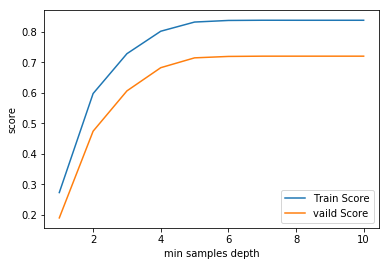

In [51]:
train_score=[]
vaild_score=[]
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf=RandomForestRegressor(random_state=1234,n_estimators=30,\
                             min_samples_leaf=11,min_samples_split=24\
                               ,max_depth=v_max_depth,criterion='mae')
    rf.fit(df_trainx,df_trainy)
    train_score.append(rf.score(df_trainx,df_trainy))
    vaild_score.append(rf.score(df_vaild_x,df_vaild_y))
                      
df_score_depth = pd.DataFrame()
df_score_depth['depth']=para_depth
df_score_depth['TrainScore']=train_score
df_score_depth['vaildScore']=vaild_score

display(df_score_depth.round(3))

plt.plot(para_depth,train_score,linestyle='-',label='Train Score')
plt.plot(para_depth,vaild_score,linestyle='-',label='vaild Score')
plt.ylabel('score'); plt.xlabel('min samples depth')
plt.legend()

#vaildscore가 두번째로 높은 6을 선택하였다. vaildscore값이 가장 높은 값은 7이지만 trainscore의 값 또한
#높기 때문에 과적합 가능성이 있어 한단계 낮은 6으로 결정하였다.

In [52]:
#최종모델

rf_final=RandomForestRegressor(random_state=1234,n_estimators=60,\
                             min_samples_leaf=17,min_samples_split=34\
                               ,max_depth=6,criterion='mae')
rf_final.fit(df_trainx,df_trainy)
print('score on trainig set:{:.3f}'.format(rf_final.score(df_trainx,df_trainy)))
print('score on vaild set:{:.3f}'.format(rf_final.score(df_vaild_x,df_vaild_y)))
print('score on test set:{:.3f}'.format(rf_final.score(df_test_x,df_test_y)))
rf_final

#최종모델의 결과  train,vaild,test 모든 데이터를 잘 예측하였다.그러나 mse로 구현한 모델의 test예측력이 미세하게 더 높다.

score on trainig set:0.799
score on vaild set:0.693
score on test set:0.734


RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=34,
           min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=1,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

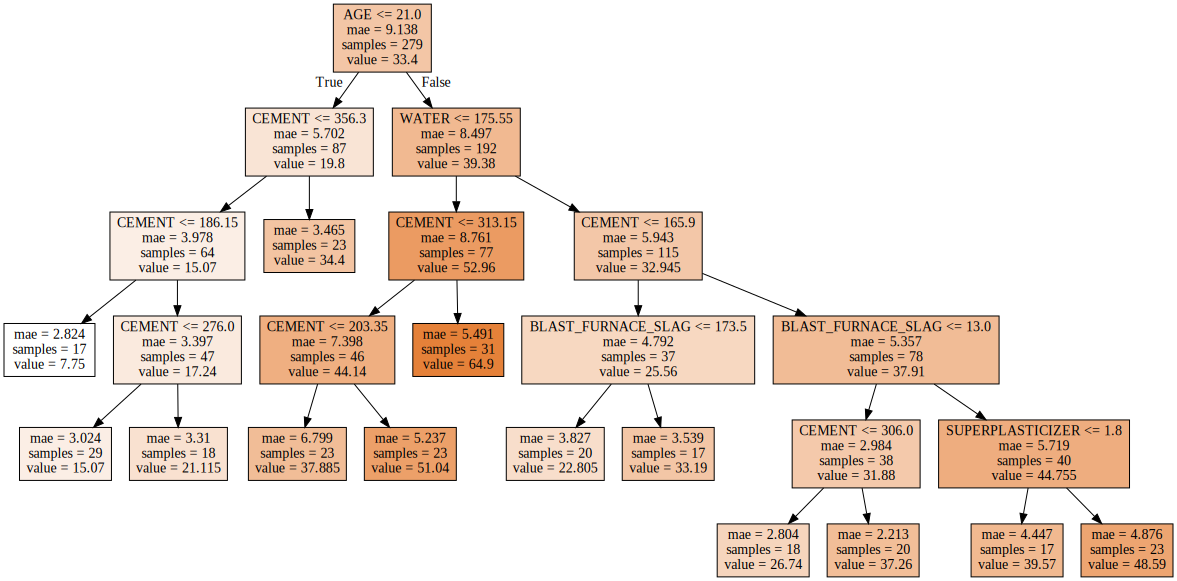

In [53]:
#그래프
v_feature_names=df_trainx.columns

export_graphviz(rf_final.estimators_[0],out_file='rfr_final_0.dot',\
                feature_names=v_feature_names,impurity=True,filled=True)
with open('rfr_final_0.dot')as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

# 가장 약한 압축강도는 age가 21이하이고  cement 가 186.15이하일 때 이다.
# 가장 강한 압축강도는 age가 21이상이고   cement가 357이상,SUPERPLASTICIZER가 10.5이상 일 때 이다.
#mse로 구현한 그래프와 같다.  mse와 mae의 값이 차이가 많이나서 결과가 다를거라 생각했지만 결과는 차이가 거의 없었다.

# 그래디언트 부스팅

In [54]:
from sklearn.ensemble import GradientBoostingRegressor

df=pd.read_csv('Concrete.csv',engine='python',encoding='949')
df_y=df['CONCRETE_COMPRESSIVE_STRENGTH']
df_x=df.drop('CONCRETE_COMPRESSIVE_STRENGTH',axis=1,inplace=False)
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_x,df_y,test_size=0.6,random_state=1234)
df_vaild_x,df_testx,df_vaild_y,df_testy=train_test_split(df_test_x,df_test_y,test_size=0.5,random_state=1234)

print('train data x size:{}'.format(df_train_x.shape))
print('train data y size:{}'.format(df_train_y.shape))
print('test data x size:{}'.format(df_testx.shape))
print('test data y size:{}'.format(df_testy.shape))
print('vaild data x size:{}'.format(df_vaild_x.shape))
print('vaild data y size:{}'.format(df_vaild_y.shape))


train data x size:(412, 8)
train data y size:(412,)
test data x size:(309, 8)
test data y size:(309,)
vaild data x size:(309, 8)
vaild data y size:(309,)


In [55]:
gb_un=GradientBoostingRegressor(random_state=1234)
gb_un.fit(df_train_x,df_train_y)
print('score on training set:{:.3f}'.format(rf_un.score(df_train_x,df_train_y)))
print('score on vaild set:{:.3f}'.format(rf_un.score(df_vaild_x,df_vaild_y)))

score on training set:0.910
score on vaild set:0.883


In [56]:
train_score=[]
vaild_score=[]
para_n_tree=[n_tree*5 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    gb=GradientBoostingRegressor(n_estimators=v_n_estimators,random_state=1234)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    vaild_score.append(gb.score(df_vaild_x,df_vaild_y))
                      
df_score_n = pd.DataFrame()
df_score_n['n']=para_n_tree
df_score_n['TrainScore']=train_score
df_score_n['vaildScore']=vaild_score

df_score_n.round(3)

#n=25일때  train 과 vaild의 차이가 적은 선택한다.

,n,TrainScore,vaildScore
0,5,0.438,0.421
1,10,0.635,0.609
2,15,0.742,0.708
3,20,0.800,0.763
4,25,0.838,0.802
5,30,0.863,0.825
6,35,0.880,0.841
7,40,0.893,0.854
8,45,0.903,0.864
9,50,0.911,0.873


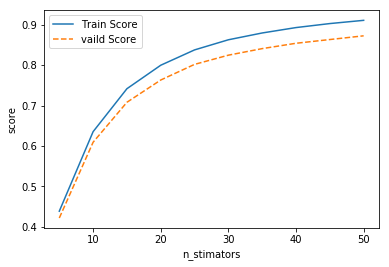

In [57]:
plt.plot(para_n_tree,train_score,linestyle='-',label='Train Score')
plt.plot(para_n_tree,vaild_score,linestyle='--',label='vaild Score')
plt.ylabel('score'); plt.xlabel('n_stimators')
plt.legend()

In [58]:
train_score=[]
vaild_score=[]
para_leaf=[n_leaf*1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    gb=GradientBoostingRegressor(random_state=1234,n_estimators=25,\
                             min_samples_leaf=v_min_samples_leaf)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    vaild_score.append(gb.score(df_vaild_x,df_vaild_y))
                      
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf']=para_leaf
df_score_leaf['TrainScore']=train_score
df_score_leaf['vaildScore']=vaild_score

df_score_leaf.round(3)

#vaildscore가 가장 높은 leaf=6 일때 채택

,MinSamplesLeaf,TrainScore,vaildScore
0,1,0.838,0.802
1,2,0.838,0.799
2,3,0.838,0.800
3,4,0.837,0.798
4,5,0.838,0.800
5,6,0.835,0.802
6,7,0.836,0.799
7,8,0.836,0.800
8,9,0.834,0.799
9,10,0.831,0.797


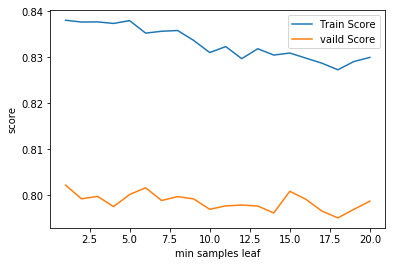

In [59]:
plt.plot(para_leaf,train_score,linestyle='-',label='Train Score')
plt.plot(para_leaf,vaild_score,linestyle='-',label='vaild Score')
plt.ylabel('score'); plt.xlabel('min samples leaf')
plt.legend()

In [62]:
train_score=[]
vaild_score=[]
para_split=[n_split*2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    gb=GradientBoostingRegressor(random_state=1234,n_estimators=25,\
                             min_samples_leaf=6,min_samples_split=v_min_samples_split)
    gb.fit(df_vaild_x,df_vaild_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    vaild_score.append(gb.score(df_vaild_x,df_vaild_y))
                      
df_score_split = pd.DataFrame()
df_score_split['MinSamplessplit']=para_split
df_score_split['TrainScore']=train_score
df_score_split['vaildScore']=vaild_score

df_score_split.round(3)

#vaildscore 가 가장 높고 split가 가장 큰 20을  채택

,MinSamplessplit,TrainScore,vaildScore
0,4,0.767,0.870
1,6,0.767,0.870
2,8,0.767,0.870
3,10,0.767,0.870
4,12,0.767,0.870
5,14,0.766,0.870
6,16,0.770,0.871
7,18,0.770,0.870
8,20,0.768,0.871
9,22,0.769,0.869


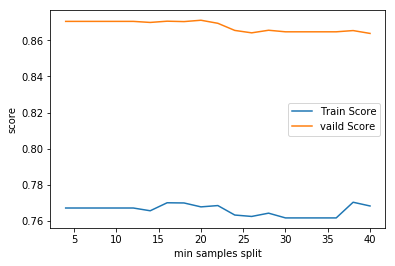

In [63]:
plt.plot(para_split,train_score,linestyle='-',label='Train Score')
plt.plot(para_split,vaild_score,linestyle='-',label='vaild Score')
plt.ylabel('score'); plt.xlabel('min samples split')
plt.legend()

In [64]:
train_score=[]
vaild_score=[]
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb=GradientBoostingRegressor(random_state=1234,n_estimators=25,\
                             min_samples_leaf=6,min_samples_split=20\
                               ,max_depth=v_max_depth)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    vaild_score.append(gb.score(df_vaild_x,df_vaild_y))
                      
df_score_depth = pd.DataFrame()
df_score_depth['depth']=para_depth
df_score_depth['TrainScore']=train_score
df_score_depth['vaildScore']=vaild_score

df_score_depth.round(3)

#train 과 vaild의 차이가 가장 적은 depth=2를 선택

,depth,TrainScore,vaildScore
0,1,0.541,0.534
1,2,0.747,0.728
2,3,0.834,0.798
3,4,0.896,0.850
4,5,0.924,0.864
5,6,0.942,0.873
6,7,0.948,0.870
7,8,0.953,0.873
8,9,0.953,0.873
9,10,0.953,0.874


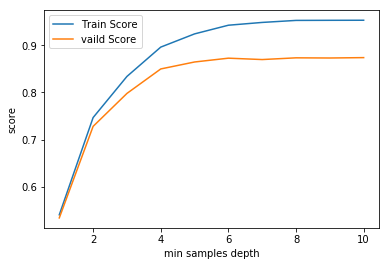

In [65]:
plt.plot(para_depth,train_score,linestyle='-',label='Train Score')
plt.plot(para_depth,vaild_score,linestyle='-',label='vaild Score')
plt.ylabel('score'); plt.xlabel('min samples depth')
plt.legend()

In [66]:
train_score=[]
vaild_score=[]
para_lr=[lr*0.1 for lr in range(1,10)]
for v_learning_rate in para_lr:
    gb=GradientBoostingRegressor(random_state=1234,n_estimators=25,\
                             min_samples_leaf=6,min_samples_split=20\
                               ,max_depth=2,learning_rate=v_learning_rate)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    vaild_score.append(gb.score(df_vaild_x,df_vaild_y))

df_score_lr=pd.DataFrame()
df_score_lr['learningrate']=para_lr
df_score_lr['trainscore']=train_score
df_score_lr['vaildscore']=vaild_score

df_score_lr.round(3)
#train 과 vaild 차가 가장 적은 rate=0.2를 채택한다.

,learningrate,trainscore,vaildscore
0,0.1,0.747,0.728
1,0.2,0.858,0.846
2,0.3,0.891,0.879
3,0.4,0.901,0.890
4,0.5,0.909,0.891
5,0.6,0.910,0.881
6,0.7,0.911,0.896
7,0.8,0.907,0.877
8,0.9,0.915,0.863


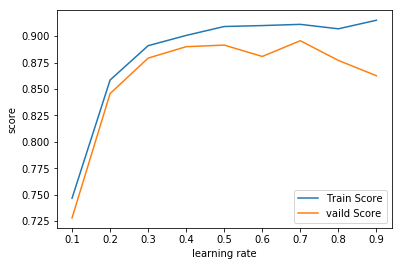

In [67]:
plt.plot(para_lr,train_score,linestyle='-',label='Train Score')
plt.plot(para_lr,vaild_score,linestyle='-',label='vaild Score')
plt.ylabel('score'); plt.xlabel('learning rate')
plt.legend()

In [68]:
gb_final=GradientBoostingRegressor(random_state=1234,n_estimators=25,\
                             min_samples_leaf=6,min_samples_split=20\
                               ,max_depth=2,learning_rate=0.2)
gb_final.fit(df_train_x,df_train_y)

print('score on trainig set:{:.3f}'.format(gb_final.score(df_train_x,df_train_y)))
print('score on vaild set:{:.3f}'.format(gb_final.score(df_vaild_x,df_vaild_y)))
print('score on test set:{:.3f}'.format(gb_final.score(df_testx,df_testy)))

#최종 모델 결과 train,vaild,test데이터 전부를 잘 예측한다.

score on trainig set:0.858
score on vaild set:0.846
score on test set:0.855


In [69]:
v_feature_names=df_train_x.columns

df_importance=pd.DataFrame()
df_importance['feature']=v_feature_names
df_importance['importance']=gb_final.feature_importances_
df_importance.sort_values('importance',ascending=False,inplace=True)
df_importance.round(3)



,feature,importance
0,CEMENT,0.312
7,AGE,0.277
1,BLAST_FURNACE_SLAG,0.161
3,WATER,0.117
6,FINE_AGGREGATE,0.081
4,SUPERPLASTICIZER,0.034
5,COARSE_AGGREGATE,0.017
2,FLY_ASH,0.000


Text(0,0.5,'변수')

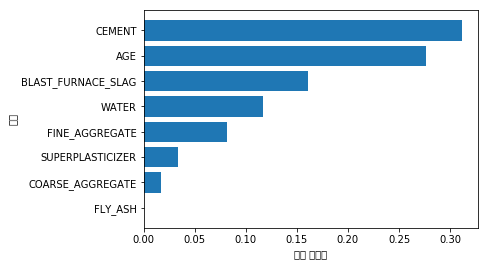

In [70]:
df_importance.sort_values('importance',ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['importance'])
plt.yticks(coordinates,df_importance['feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

#변수 중요도는 age,cement,water 순으로 높다.

In [73]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
y_pred=gb_final.predict(df_testx)
print('mse: {:.3f}'.format(mean_squared_error(df_testy,y_pred)))
print('mae: {:.3f}'.format(mean_absolute_error(df_testy,y_pred)))

# mse 와 mae의 차이가 매우 크게 나타난다. mae로 기준을 바꿔서 모델을 구현하면 전혀 다른 모델이 구현될 가능성이 높다.

mse: 41.029
mae: 5.214


# mae 기준

기본모델
score on training set:0.910
score on vaild set:0.883


,n,TrainScore,vaildScore
0,5,0.432,0.428
1,10,0.628,0.619
2,15,0.726,0.709
3,20,0.786,0.765
4,25,0.823,0.797
5,30,0.847,0.821
6,35,0.865,0.836
7,40,0.881,0.846
8,45,0.892,0.854
9,50,0.900,0.859


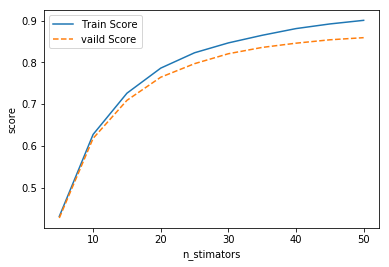

In [76]:
gb_un=GradientBoostingRegressor(random_state=1234,criterion='mae')
gb_un.fit(df_train_x,df_train_y)
print('기본모델')
print('score on training set:{:.3f}'.format(rf_un.score(df_train_x,df_train_y)))
print('score on vaild set:{:.3f}'.format(rf_un.score(df_vaild_x,df_vaild_y)))

train_score=[]
vaild_score=[]
para_n_tree=[n_tree*5 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    gb=GradientBoostingRegressor(n_estimators=v_n_estimators,random_state=1234\
                                ,criterion='mae')
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    vaild_score.append(gb.score(df_vaild_x,df_vaild_y))
                      
df_score_n = pd.DataFrame()
df_score_n['n']=para_n_tree
df_score_n['TrainScore']=train_score
df_score_n['vaildScore']=vaild_score

display(df_score_n.round(3))

plt.plot(para_n_tree,train_score,linestyle='-',label='Train Score')
plt.plot(para_n_tree,vaild_score,linestyle='--',label='vaild Score')
plt.ylabel('score'); plt.xlabel('n_stimators')
plt.legend()

#n=25일때  train 과 vaild의 차이가 적은 선택한다.

,MinSamplesLeaf,TrainScore,vaildScore
0,1,0.823,0.797
1,2,0.822,0.795
2,3,0.822,0.798
3,4,0.820,0.798
4,5,0.816,0.797
5,6,0.818,0.798
6,7,0.814,0.792
7,8,0.816,0.798
8,9,0.815,0.795
9,10,0.813,0.794


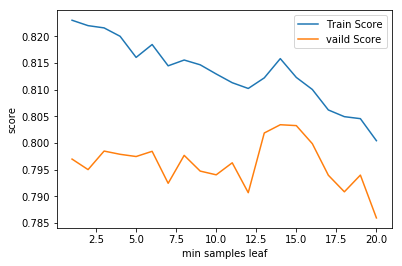

In [77]:
train_score=[]
vaild_score=[]
para_leaf=[n_leaf*1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    gb=GradientBoostingRegressor(random_state=1234,n_estimators=25,\
                             min_samples_leaf=v_min_samples_leaf,criterion='mae')
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    vaild_score.append(gb.score(df_vaild_x,df_vaild_y))
                      
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf']=para_leaf
df_score_leaf['TrainScore']=train_score
df_score_leaf['vaildScore']=vaild_score

display(df_score_leaf.round(3))

plt.plot(para_leaf,train_score,linestyle='-',label='Train Score')
plt.plot(para_leaf,vaild_score,linestyle='-',label='vaild Score')
plt.ylabel('score'); plt.xlabel('min samples leaf')
plt.legend()

# vaildscore가 가장 높은 leaf=15 일때 채택

,MinSamplessplit,TrainScore,vaildScore
0,4,0.728,0.835
1,6,0.728,0.835
2,8,0.728,0.835
3,10,0.728,0.835
4,12,0.728,0.835
5,14,0.728,0.835
6,16,0.728,0.835
7,18,0.728,0.835
8,20,0.728,0.835
9,22,0.728,0.835


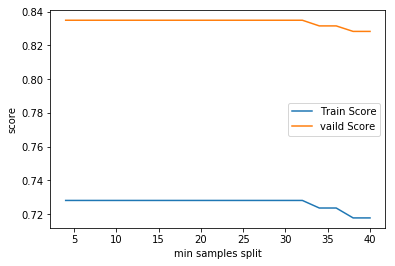

In [78]:
train_score=[]
vaild_score=[]
para_split=[n_split*2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    gb=GradientBoostingRegressor(random_state=1234,n_estimators=25,\
                             min_samples_leaf=15,min_samples_split=v_min_samples_split,criterion='mae')
    gb.fit(df_vaild_x,df_vaild_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    vaild_score.append(gb.score(df_vaild_x,df_vaild_y))
                      
df_score_split = pd.DataFrame()
df_score_split['MinSamplessplit']=para_split
df_score_split['TrainScore']=train_score
df_score_split['vaildScore']=vaild_score

display(df_score_split.round(3))

plt.plot(para_split,train_score,linestyle='-',label='Train Score')
plt.plot(para_split,vaild_score,linestyle='-',label='vaild Score')
plt.ylabel('score'); plt.xlabel('min samples split')
plt.legend()

#vaildscore가 가장 높고 split가 큰 32일때 를 채택

,depth,TrainScore,vaildScore
0,1,0.511,0.520
1,2,0.733,0.728
2,3,0.811,0.801
3,4,0.853,0.832
4,5,0.873,0.847
5,6,0.874,0.838
6,7,0.878,0.847
7,8,0.879,0.843
8,9,0.882,0.848
9,10,0.882,0.848


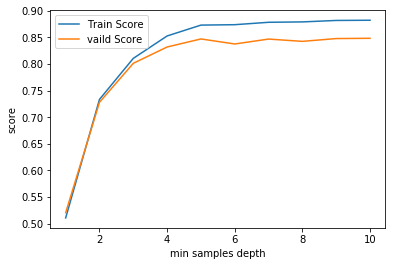

In [79]:
train_score=[]
vaild_score=[]
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb=GradientBoostingRegressor(random_state=1234,n_estimators=25,\
                             min_samples_leaf=15,min_samples_split=32\
                               ,max_depth=v_max_depth,criterion='mae')
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    vaild_score.append(gb.score(df_vaild_x,df_vaild_y))
                      
df_score_depth = pd.DataFrame()
df_score_depth['depth']=para_depth
df_score_depth['TrainScore']=train_score
df_score_depth['vaildScore']=vaild_score

display(df_score_depth.round(3))

plt.plot(para_depth,train_score,linestyle='-',label='Train Score')
plt.plot(para_depth,vaild_score,linestyle='-',label='vaild Score')
plt.ylabel('score'); plt.xlabel('min samples depth')
plt.legend()

#train 과 vaild의 차이가 적고 depth의 크기가 작은 6를 선택

,learningrate,trainscore,vaildscore
0,0.1,0.874,0.838
1,0.2,0.921,0.897
2,0.3,0.931,0.911
3,0.4,0.930,0.898
4,0.5,0.929,0.890
5,0.6,0.936,0.890
6,0.7,0.929,0.882
7,0.8,0.921,0.838
8,0.9,0.928,0.806


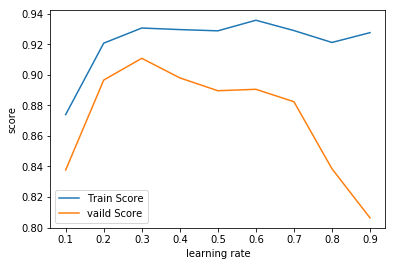

In [80]:
train_score=[]
vaild_score=[]
para_lr=[lr*0.1 for lr in range(1,10)]
for v_learning_rate in para_lr:
    gb=GradientBoostingRegressor(random_state=1234,n_estimators=25,\
                             min_samples_leaf=15,min_samples_split=32\
                               ,max_depth=6,learning_rate=v_learning_rate,criterion='mae')
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    vaild_score.append(gb.score(df_vaild_x,df_vaild_y))

df_score_lr=pd.DataFrame()
df_score_lr['learningrate']=para_lr
df_score_lr['trainscore']=train_score
df_score_lr['vaildscore']=vaild_score

display(df_score_lr.round(3))

plt.plot(para_lr,train_score,linestyle='-',label='Train Score')
plt.plot(para_lr,vaild_score,linestyle='-',label='vaild Score')
plt.ylabel('score'); plt.xlabel('learning rate')
plt.legend()
#vaildscore가 큰 rate=0.3를 채택한다.

최종모델
score on trainig set:0.930
score on vaild set:0.912
score on test set:0.884 


변수 중요도


,feature,importance
0,CEMENT,0.196
3,WATER,0.169
7,AGE,0.160
6,FINE_AGGREGATE,0.159
1,BLAST_FURNACE_SLAG,0.106
4,SUPERPLASTICIZER,0.092
5,COARSE_AGGREGATE,0.081
2,FLY_ASH,0.038


Text(0,0.5,'변수')

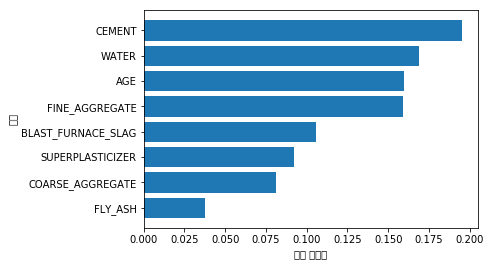

In [81]:
print('최종모델')

gb_final=GradientBoostingRegressor(random_state=1234,n_estimators=25,\
                             min_samples_leaf=15,min_samples_split=32\
                               ,max_depth=6,learning_rate=0.3,criterion='mae')
gb_final.fit(df_train_x,df_train_y)

print('score on trainig set:{:.3f}'.format(gb_final.score(df_train_x,df_train_y)))
print('score on vaild set:{:.3f}'.format(gb_final.score(df_vaild_x,df_vaild_y)))
print('score on test set:{:.3f}'.format(gb_final.score(df_testx,df_testy)),'\n\n')


print('변수 중요도')
v_feature_names=df_train_x.columns

df_importance=pd.DataFrame()
df_importance['feature']=v_feature_names
df_importance['importance']=gb_final.feature_importances_
df_importance.sort_values('importance',ascending=False,inplace=True)
display(df_importance.round(3))

df_importance.sort_values('importance',ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['importance'])
plt.yticks(coordinates,df_importance['feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

#최종모델 결과 train,vaild,test 데이터에서 높은 설명력을 가진다. 변수의 중요는 AGE,CEMENT,SUPERPLASTICIZER,WATER 순으로 높다.
#mse와 mae값의 차이가 커서 결과에 차이가 높을 것으로 예상했지만 결과에는 별로 차이가 없었다.